<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_optymalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd

tickers = ['TSLA','NFLX']
today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=5)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source = 'yahoo'
data = web.DataReader(tickers, data_source, start_date, end_date)
data_to_show1 =  web.DataReader(tickers[0], data_source, start_date, end_date)
data_to_show2 =  web.DataReader(tickers[1], data_source, start_date, end_date)

In [35]:
data_to_show1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,33.498001,32.500000,32.731998,33.316002,14797000.0,33.316002
2016-02-22,35.782001,33.970001,34.023998,35.548000,25300500.0,35.548000
2016-02-23,36.346001,34.736000,35.231998,35.442001,29922000.0,35.442001
2016-02-24,35.900002,33.568001,34.549999,35.799999,26978000.0,35.799999
2016-02-25,37.703999,35.040001,35.730000,37.486000,28753500.0,37.486000
...,...,...,...,...,...,...
2021-02-11,829.880005,801.729980,812.440002,811.659973,21580700.0,811.659973
2021-02-12,817.330017,785.330017,801.260010,816.119995,23701700.0,816.119995
2021-02-16,821.000000,792.440002,818.000000,796.219971,19686700.0,796.219971


In [36]:
data_to_show2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,91.400002,88.029999,89.980003,89.230003,14259200,89.230003
2016-02-22,93.110001,88.300003,90.750000,91.930000,16321800,91.930000
2016-02-23,92.489998,89.050003,91.400002,89.120003,12744400,89.120003
2016-02-24,91.760002,86.699997,88.500000,91.610001,15972800,91.610001
2016-02-25,94.809998,90.209999,91.080002,94.529999,17898800,94.529999
...,...,...,...,...,...,...
2021-02-11,565.929993,554.219971,564.440002,557.590027,2726700,557.590027
2021-02-12,561.250000,550.849976,556.940002,556.520020,2195900,556.520020
2021-02-16,563.630005,552.729980,557.289978,557.280029,2622400,557.280029


In [37]:
adj_close = data["Adj Close"]
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,TSLA,NFLX
Date,,
2016-02-19,NaN,NaN
2016-02-22,0.064846,0.029810
2016-02-23,-0.002986,-0.031044
2016-02-24,0.010050,0.027557
2016-02-25,0.046020,0.031377
...,...,...
2021-02-11,0.008463,-0.010703
2021-02-12,0.005480,-0.001921
2021-02-16,-0.024686,0.001365


In [38]:
log_returns.mean() * 250

Symbols
TSLA    0.628512
NFLX    0.360783
dtype: float64

In [39]:
log_returns.cov() * 250

Symbols,TSLA,NFLX
Symbols,,
TSLA,0.329243,0.075343
NFLX,0.075343,0.160491


In [40]:
log_returns.corr()

Symbols,TSLA,NFLX
Symbols,,
TSLA,1.000000,0.327761
NFLX,0.327761,1.000000


Text(0, 0.5, 'Expected Return')

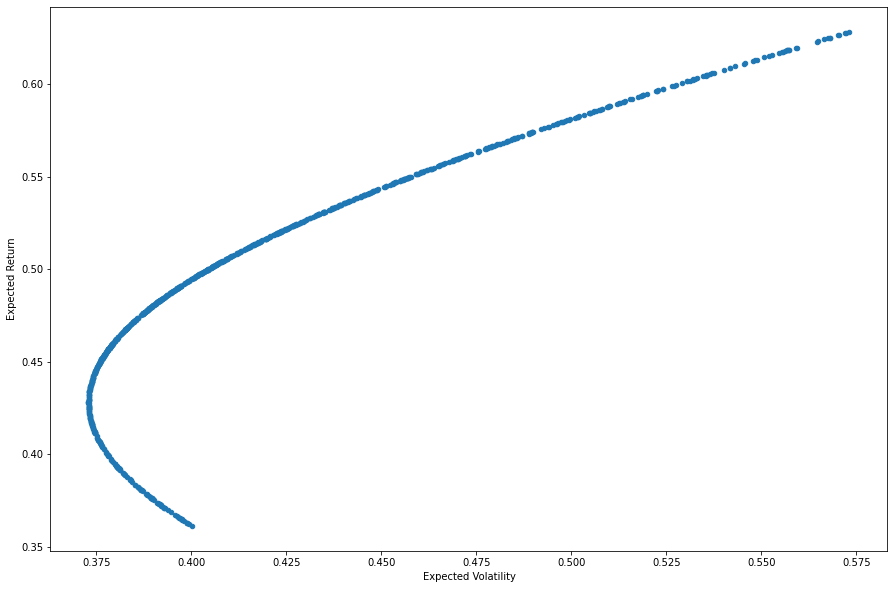

In [41]:
portfolio_returns = []
portfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
                                  
portfolio_returns[0]

np.sum(weights * log_returns.mean()) * 250

np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')